In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RANDOM_STATE = 42

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
data_path = "data/energydata_complete.csv"

df = pd.read_csv(data_path)

print("Formato do dataset:", df.shape)
df.head()


Formato do dataset: (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [ ]:
# Verifica valores nulos dentro do dataset
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
# Garantir que a coluna de data está como datetime
df["date"] = pd.to_datetime(df["date"])

# Criar hora do dia e dia da semana como novas features
df["hour"] = df["date"].dt.hour
df["day_of_week"] = df["date"].dt.dayofweek  # 0 = segunda, 6 = domingo

df[["date", "hour", "day_of_week"]].head()

,date,hour,day_of_week
0,2016-01-11 17:00:00,17,0
1,2016-01-11 17:10:00,17,0
2,2016-01-11 17:20:00,17,0
3,2016-01-11 17:30:00,17,0
4,2016-01-11 17:40:00,17,0


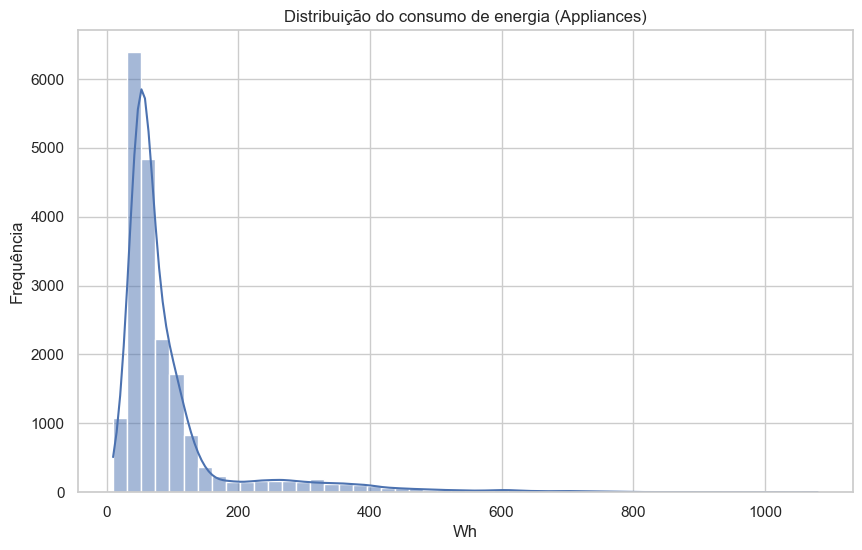

In [23]:
target_col = "Appliances"

plt.figure()
sns.histplot(df[target_col], bins=50, kde=True)
plt.title("Distribuição do consumo de energia (Appliances)")
plt.xlabel("Wh")
plt.ylabel("Frequência")
plt.show()

In [7]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

# Correlação das variáveis numéricas com o target
target_corr = corr_matrix[target_col].sort_values(ascending=False)
target_corr


Appliances     1.000000
hour           0.216792
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
day_of_week    0.003060
Visibility     0.000230
rv2           -0.011145
rv1           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

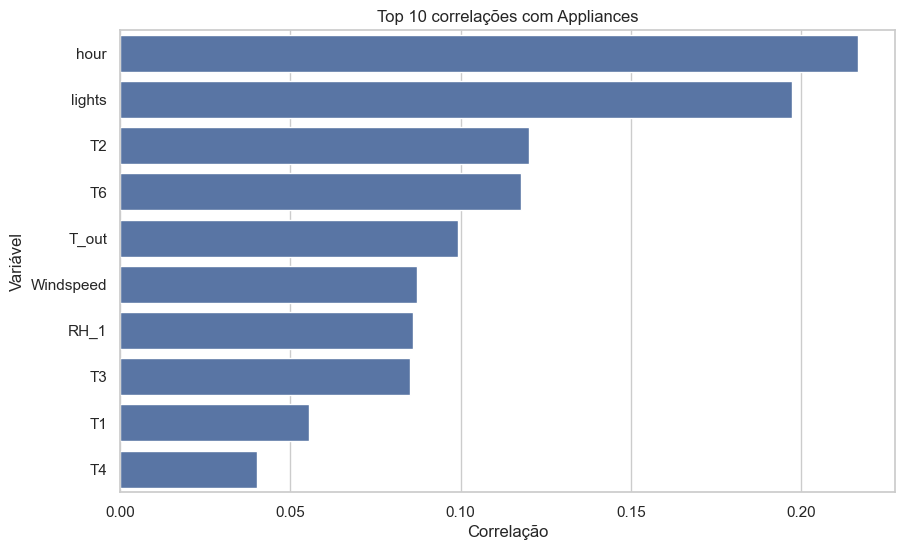

In [8]:
# Visualizar as top 10 variáveis mais correlacionadas com o target (excluindo o próprio Appliances)
top_features = target_corr.drop(target_col).head(10)

plt.figure()
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 correlações com Appliances")
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.show()


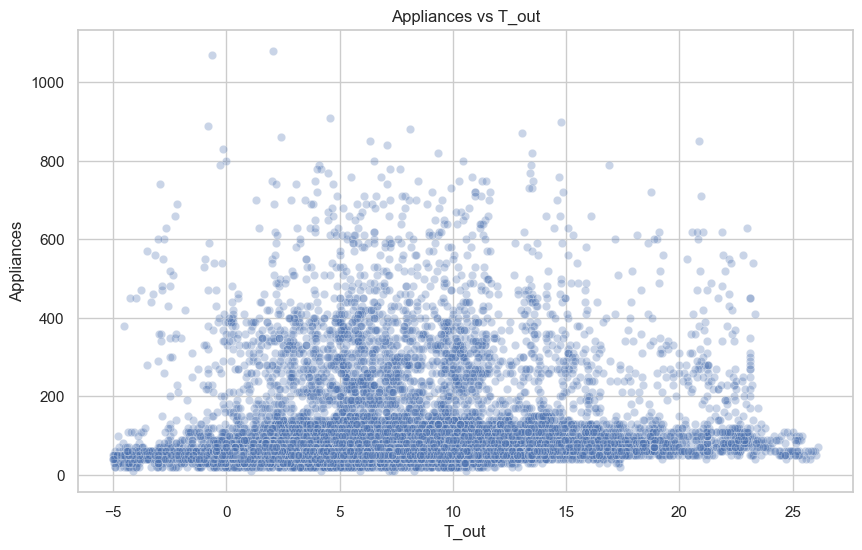

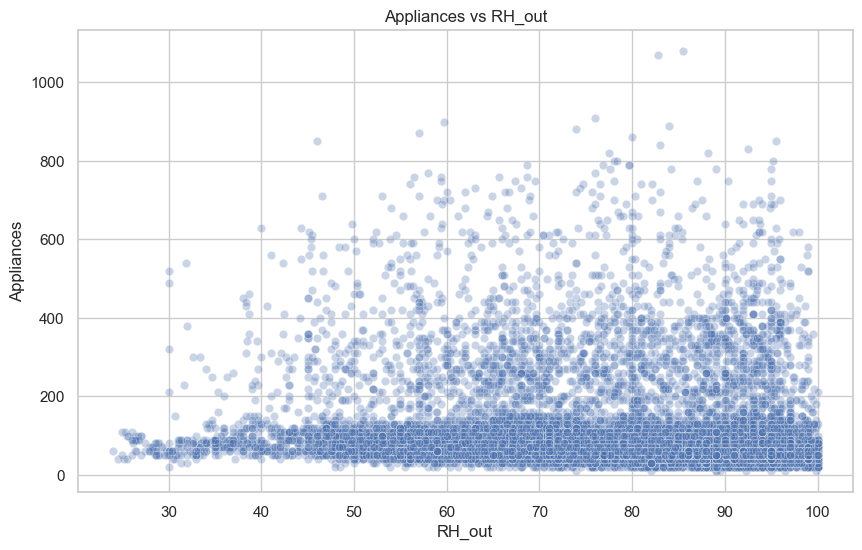

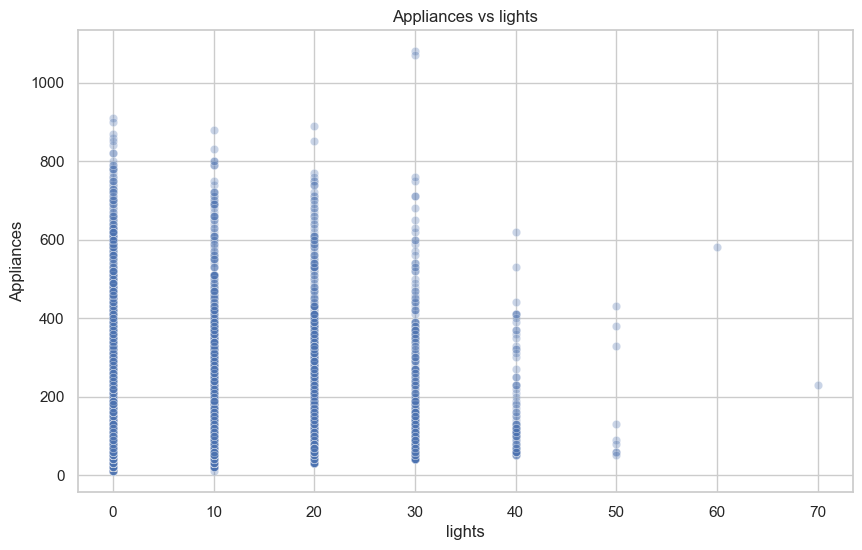

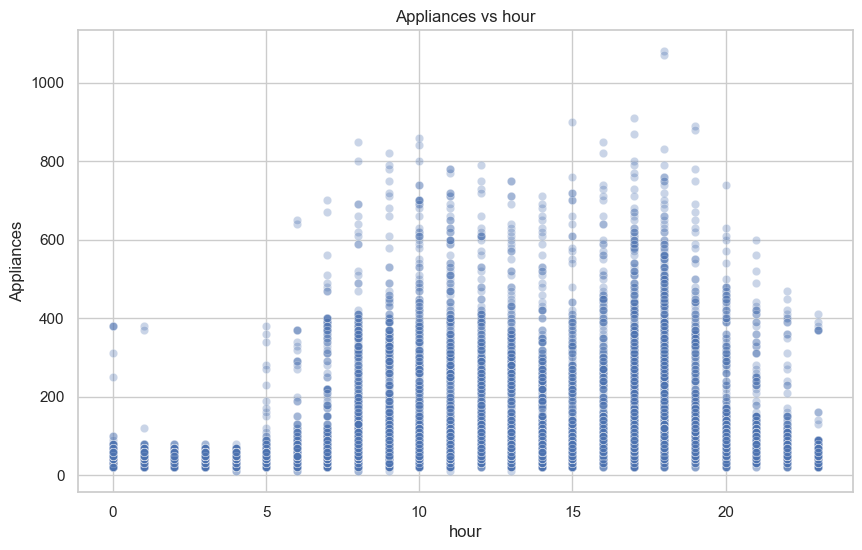

In [9]:
cols_to_plot = ["T_out", "RH_out", "lights", "hour"]

for col in cols_to_plot:
    plt.figure()
    sns.scatterplot(x=df[col], y=df[target_col], alpha=0.3)
    plt.title(f"{target_col} vs {col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

In [10]:
# Target
y = df[target_col]

# Colunas que vamos remover de X
cols_to_drop = ["date", "Appliances", "rv1", "rv2"]

# Garante que só dropamos colunas que existem
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

X = df.drop(columns=cols_to_drop)

X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,day_of_week
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,17,0
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,17,0
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,17,0
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,17,0
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,17,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

print("Formato X_train:", X_train.shape)
print("Formato X_test: ", X_test.shape)


Formato X_train: (13814, 27)
Formato X_test:  (5921, 27)


In [12]:
# Pipeline: StandardScaler + Ridge
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(random_state=RANDOM_STATE))
])

# Grid de hiperparâmetros para o Ridge
ridge_param_grid = {
    "model__alpha": [0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train, y_train)

print("Melhores parâmetros (Ridge):", ridge_grid.best_params_)
print("Melhor score (neg MSE, CV):", ridge_grid.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros (Ridge): {'model__alpha': 1.0}
Melhor score (neg MSE, CV): -8875.200855074008


In [13]:
best_ridge = ridge_grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Métricas no teste")
print(f"MAE : {ridge_mae:.3f}")
print(f"RMSE: {ridge_rmse:.3f}")
print(f"R²  : {ridge_r2:.3f}")


Ridge Regression - Métricas no teste
MAE : 52.933
RMSE: 92.544
R²  : 0.169


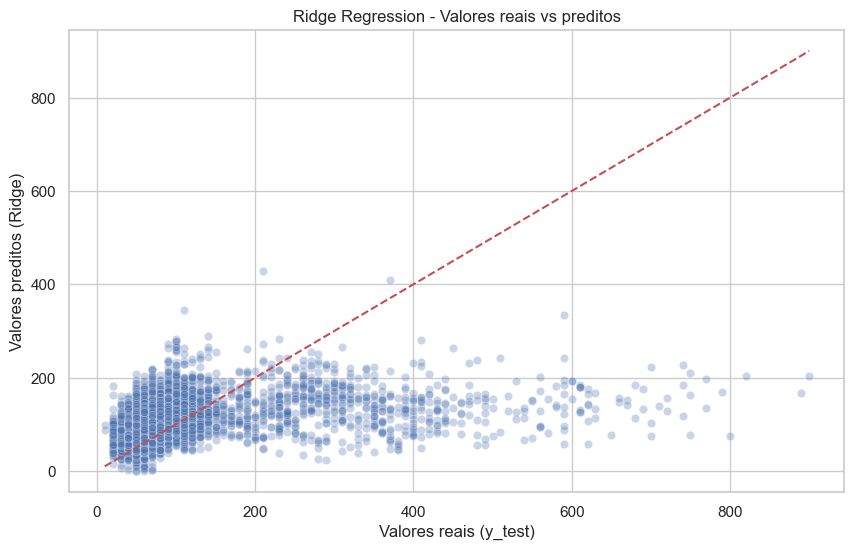

In [14]:
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.3)
plt.xlabel("Valores reais (y_test)")
plt.ylabel("Valores preditos (Ridge)")
plt.title("Ridge Regression - Valores reais vs preditos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # linha y=x
plt.show()

In [15]:

rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

rf_param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 5]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Melhores parâmetros (Random Forest):", rf_grid.best_params_)
print("Melhor score (neg MSE, CV):", rf_grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores parâmetros (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}
Melhor score (neg MSE, CV): -5837.3432252153825


In [16]:
# Célula 16 — Avaliação do Random Forest no teste
best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest - Métricas no teste")
print(f"MAE : {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R²  : {rf_r2:.3f}")


Random Forest - Métricas no teste
MAE : 32.541
RMSE: 68.256
R²  : 0.548


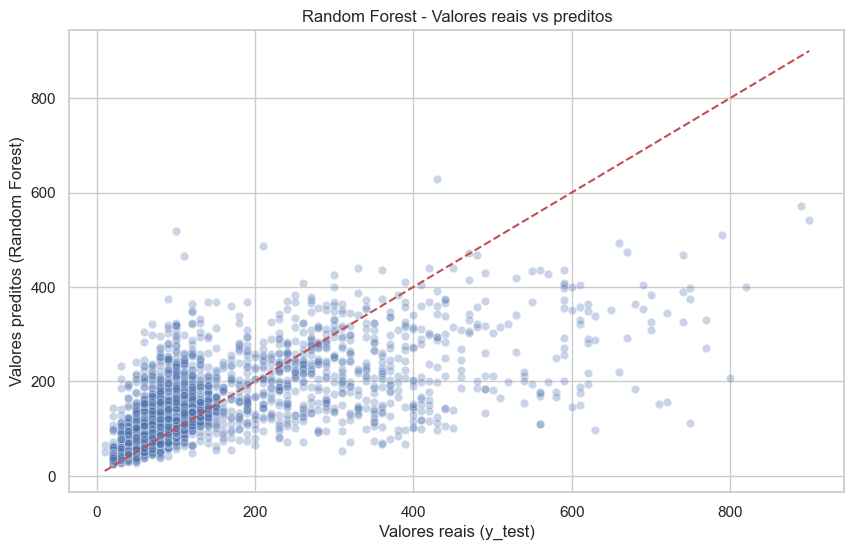

In [17]:
plt.figure()
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.xlabel("Valores reais (y_test)")
plt.ylabel("Valores preditos (Random Forest)")
plt.title("Random Forest - Valores reais vs preditos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


In [18]:
feature_importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importances.head(15)


hour           0.149939
T3             0.059475
RH_3           0.047813
Press_mm_hg    0.044857
RH_2           0.041055
RH_5           0.040198
RH_1           0.038253
T8             0.037980
Tdewpoint      0.035384
RH_9           0.031526
T_out          0.031309
RH_out         0.031124
lights         0.030681
T4             0.030616
T7             0.030606
dtype: float64

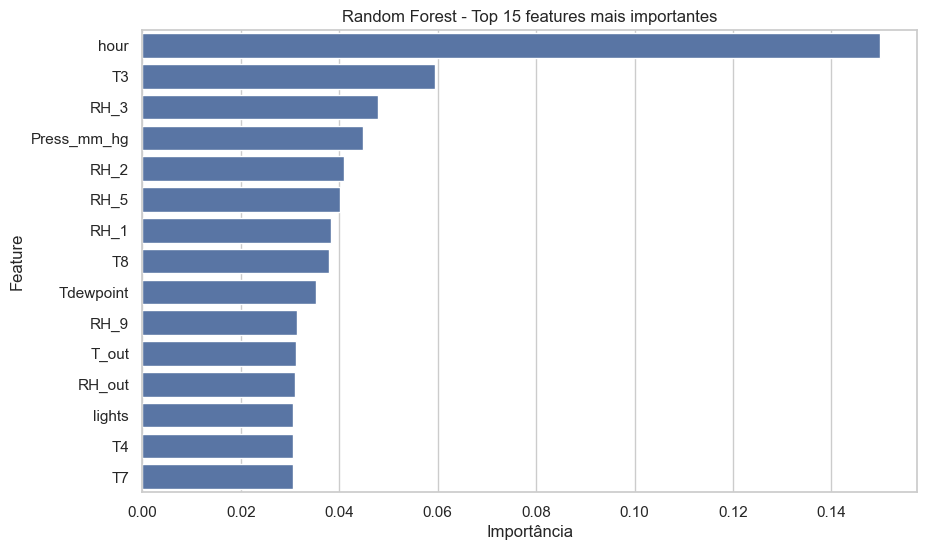

In [19]:
plt.figure()
sns.barplot(x=feature_importances.head(15).values,
            y=feature_importances.head(15).index)
plt.title("Random Forest - Top 15 features mais importantes")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Comparação final dos modelos
results = pd.DataFrame({
    "Modelo": ["Ridge", "Random Forest"],
    "MAE": [ridge_mae, rf_mae],
    "RMSE": [ridge_rmse, rf_rmse],
    "R²": [ridge_r2, rf_r2],
})

results

,Modelo,MAE,RMSE,R²
0,Ridge,52.932512,92.544248,0.168713
1,Random Forest,32.540731,68.255537,0.547803


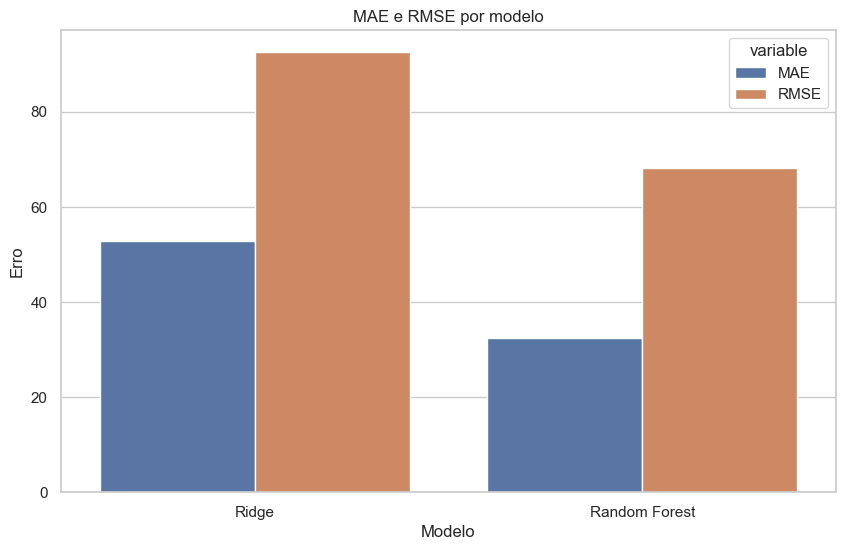

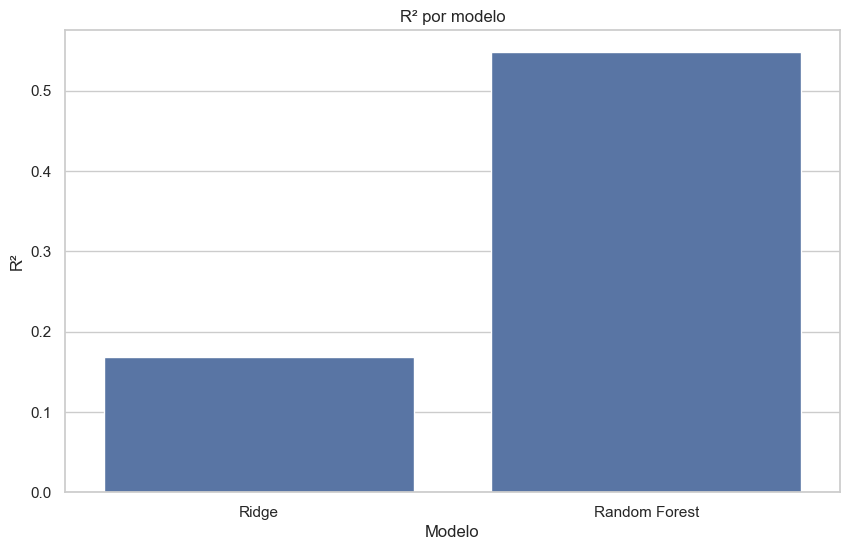

In [22]:
# Gráfico só com MAE e RMSE
results_melted_err = results.melt(
    id_vars="Modelo",
    value_vars=["MAE", "RMSE"]
)

sns.barplot(data=results_melted_err, x="Modelo", y="value", hue="variable")
plt.title("MAE e RMSE por modelo")
plt.ylabel("Erro")
plt.show()

# Gráfico separado para R²
plt.figure()
sns.barplot(x="Modelo", y="R²", data=results)
plt.title("R² por modelo")
plt.ylabel("R²")
plt.show()
